In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('ex1data2.txt',names=['size','bedrooms','price'])
data.head()


,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
def normalize_feature(data):
    return (data-data.mean())/data.std()

In [20]:
data=normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


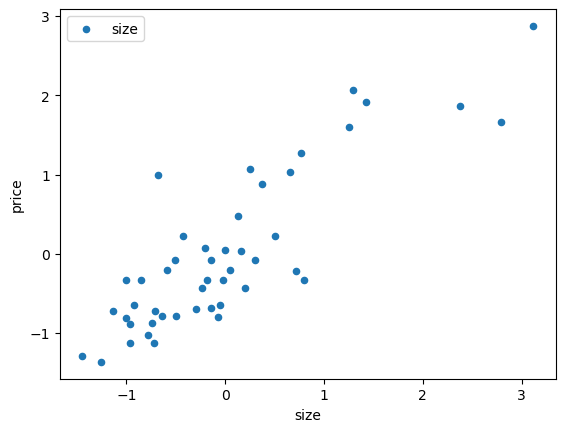

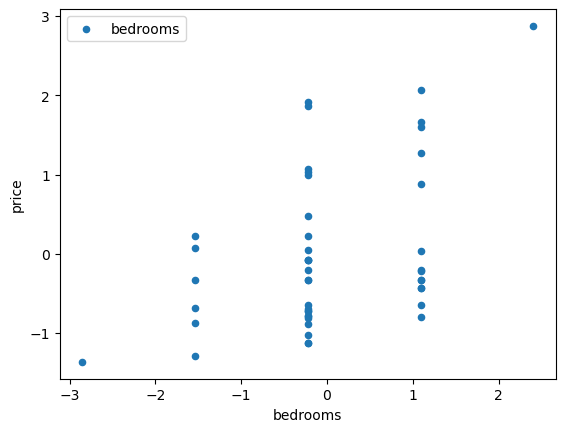

In [21]:
data.plot.scatter('size','price',label='size')
data.plot.scatter('bedrooms','price',label='bedrooms')
plt.show()

In [22]:
data.insert(0,'ones',1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [23]:
X=data.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [24]:
y=data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [25]:
X=X.values

In [26]:
X.shape

(47, 3)

In [27]:
y=y.values

In [28]:
y=y.reshape(47,1)
y.shape

(47, 1)

In [29]:
def costFunction(X,y,theta):
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))

In [30]:
theta=np.zeros((3,1))
cost_init=costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


In [31]:
def gradientDescent(X,y,theta,alpha,iters):
    costs=[]

    for i in range(iters):
        theta=theta-(X.T@(X@theta-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costs.append(cost)

    return theta,costs

In [32]:
candinate_alpha=[0.0003,0.003,0.03,0.0001,0.001,0.01]
iters=2000

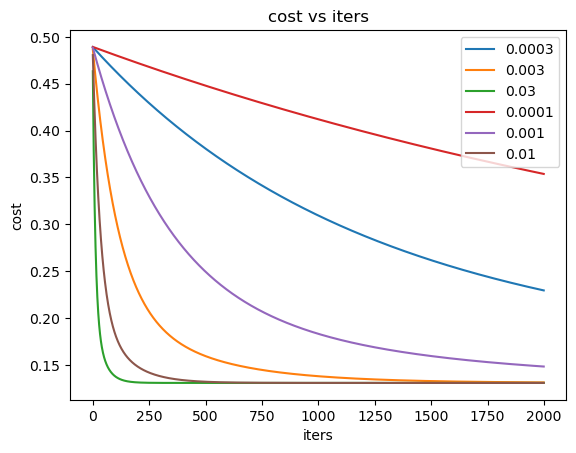

In [33]:
fig,ax=plt.subplots()

for alpha in candinate_alpha:
    _,costs=gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label=alpha)
    ax.legend()

ax.set(xlabel='iters',ylabel='cost',title='cost vs iters')
plt.show()